In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [2]:
untable1 = pd.read_csv('data/UN_MigrantStockTotal_2015_Table1.csv')
untable2 = pd.read_csv('data/UN_MigrantStockTotal_2015_Table2.csv')
untable3 = pd.read_csv('data/UN_MigrantStockTotal_2015_Table3.csv')
untable4 = pd.read_csv('data/UN_MigrantStockTotal_2015_Table4.csv')
untable5 = pd.read_csv('data/UN_MigrantStockTotal_2015_Table5.csv')
untable6 = pd.read_csv('data/UN_MigrantStockTotal_2015_Table6.csv')
untableannex = pd.read_csv('data/UN_MigrantStockTotal_2015_ANNEX.csv')

In [3]:
untable1.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,Trends in International Migrant Stock: The 201...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,Table 1 - International migrant stock at mid-...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,POP/DB/MIG/Stock/Rev.2015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#function to tidy table
def tidytable(df, x):
    #rename columns
    df.columns = ['Destination', 'Notes', 'Country code', 'Type of data', 'B1990', 'B1995', 'B2000', 'B2005', 'B2010', 'B2015', 'M1990', 'M1995', 'M2000', 'M2005', 'M2010', 'M2015', 'F1990', 'F1995', 'F2000', 'F2005', 'F2010', 'F2015']
    #drop rows containing column name information
    df_tmp = df.drop([13,14])
    #clean columns with gender and year as column names
    df_tmp = df_tmp.melt(id_vars = ['Destination', 'Notes', 'Country code', 'Type of data'], var_name = 'GendernYear', value_name = "")
    df_tmp = df_tmp.rename(columns = {"" : x})
    #split year column with gender + year information to two columns
    df_tidy = (df_tmp.assign(Gender = lambda x: x.GendernYear.str[0].astype(str),
                           Year = lambda x: x.GendernYear.str[1:].astype(str))
              .drop('GendernYear', axis=1))
    #rename gender columne
    df_tidy.loc[(df_tidy.Gender == "B"), "Gender"] = "Both"
    df_tidy.loc[(df_tidy.Gender == "M"), "Gender"] = "Male"
    df_tidy.loc[(df_tidy.Gender == "F"), "Gender"] = "Female"
    #rearrange columne orders
    col = ['Destination', 'Notes', 'Country code', 'Type of data', 'Year', 'Gender', x]
    df_tidy = df_tidy.reindex(columns=col)
    return df_tidy

In [5]:
#tidy table 1, using columns and iloc to drop the decorative table headers
untable1_tidy = tidytable(untable1[untable1.columns[1:23]].iloc[13:], 'International Migrant Stock')
untable1_tidy.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,International Migrant Stock
0,WORLD,NaN,900,NaN,1990,Both,152 563 212
1,Developed regions,(b),901,NaN,1990,Both,82 378 628
2,Developing regions,(c),902,NaN,1990,Both,70 184 584
3,Least developed countries,(d),941,NaN,1990,Both,11 075 966
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,Both,59 105 261
5,Sub-Saharan Africa,(e),947,NaN,1990,Both,14 690 319
6,Africa,NaN,903,NaN,1990,Both,15 690 623
7,Eastern Africa,NaN,910,NaN,1990,Both,5 964 031
8,Burundi,NaN,108,B R,1990,Both,333 110
9,Comoros,NaN,174,B,1990,Both,14 079


In [6]:
#tidy table 2
#adding Type of data (a) column to table 2 to align with other tables
typeofdata_df = untable1['Unnamed: 4']
typeofdata_df.columns = ['typeofdata']
untable2 = untable2.join(typeofdata_df, how='left', rsuffix='typeofdata')
cols = untable2.columns.tolist()
cols

['Unnamed: 0',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 4typeofdata']

In [7]:
cols_tmp = untable2.columns.tolist()
cols_tmp
untable2 = untable2[['Unnamed: 0','Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4typeofdata','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21']]
untable2.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4typeofdata,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,United Nations,United Nations,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Population Division,Population Division,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,Department of Economic and Social Affairs,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,Trends in International Migrant Stock: The 201...,Trends in International Migrant Stock: The 201...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,Table 1 - International migrant stock at mid-...,Table 2 - Total population at mid-year by sex...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,POP/DB/MIG/Stock/Rev.2015,POP/DB/MIG/Stock/Rev.2015,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#tidy table 2, using columns and iloc to drop the decorative table headers
untable2_tidy = tidytable(untable2[untable2.columns[1:23]].iloc[13:], 'Population (thousands)')
untable2_tidy.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Population (thousands)
0,WORLD,NaN,900,NaN,1990,Both,5 309 668
1,Developed regions,(b),901,NaN,1990,Both,1 144 463
2,Developing regions,(c),902,NaN,1990,Both,4 165 205
3,Least developed countries,(d),941,NaN,1990,Both,510 058
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,Both,3 655 147
5,Sub-Saharan Africa,(e),947,NaN,1990,Both,491 498
6,Africa,NaN,903,NaN,1990,Both,631 614
7,Eastern Africa,NaN,910,NaN,1990,Both,198 232
8,Burundi,NaN,108,B R,1990,Both,5 613
9,Comoros,NaN,174,B,1990,Both,415


In [9]:
#tidy table 3, using columns and iloc to drop the decorative table headers
untable3_tidy = tidytable(untable3[untable3.columns[1:23]].iloc[13:], 'International Migrant Stock as a Percentage of the Population')
untable3_tidy.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,International Migrant Stock as a Percentage of the Population
0,WORLD,NaN,900,NaN,1990,Both,2.9
1,Developed regions,(b),901,NaN,1990,Both,7.2
2,Developing regions,(c),902,NaN,1990,Both,1.7
3,Least developed countries,(d),941,NaN,1990,Both,2.2
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,Both,1.6
5,Sub-Saharan Africa,(e),947,NaN,1990,Both,3.0
6,Africa,NaN,903,NaN,1990,Both,2.5
7,Eastern Africa,NaN,910,NaN,1990,Both,3.0
8,Burundi,NaN,108,B R,1990,Both,5.9
9,Comoros,NaN,174,B,1990,Both,3.4


In [10]:
#tidy table 4
#seperate function to tidy table 4 as only female information is included in the table
def tidytable4(df, x):
    #rename columns
    df.columns = ['Destination', 'Notes', 'Country code', 'Type of data', 'F1990', 'F1995', 'F2000', 'F2005', 'F2010', 'F2015']
    #drop rows containing column name information
    df_tmp = df.drop([13,14])
    #clean columns with gender and year as column names
    df_tmp = df_tmp.melt(id_vars = ['Destination', 'Notes', 'Country code', 'Type of data'], var_name = 'GendernYear', value_name = "")
    df_tmp = df_tmp.rename(columns = {"" : x})
    #split year column with gender + year information to two columns
    df_tidy = (df_tmp.assign(Gender = lambda x: x.GendernYear.str[0].astype(str),
                           Year = lambda x: x.GendernYear.str[1:].astype(str))
              .drop('GendernYear', axis=1))
    #rename gender columne
    df_tidy.loc[(df_tidy.Gender == "F"), "Gender"] = "Female"
    #rearrange columne orders
    col = ['Destination', 'Notes', 'Country code', 'Type of data', 'Year', 'Gender', x]
    df_tidy = df_tidy.reindex(columns=col)
    return df_tidy
untable4_tidy = tidytable4(untable4[untable4.columns[1:23]].iloc[13:], 'Migrants as a percentage of the International migrant stock')
untable4_tidy.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Migrants as a percentage of the International migrant stock
0,WORLD,NaN,900,NaN,1990,Female,49.0
1,Developed regions,(b),901,NaN,1990,Female,51.1
2,Developing regions,(c),902,NaN,1990,Female,46.6
3,Least developed countries,(d),941,NaN,1990,Female,47.3
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,Female,46.5
5,Sub-Saharan Africa,(e),947,NaN,1990,Female,47.3
6,Africa,NaN,903,NaN,1990,Female,47.2
7,Eastern Africa,NaN,910,NaN,1990,Female,48.5
8,Burundi,NaN,108,B R,1990,Female,51.0
9,Comoros,NaN,174,B,1990,Female,52.3


In [11]:
#tidy table 5
#seperate function to tidy table 5 as it involves year-year range
def tidytable5(df, x):
    #rename columns
    df.columns = ['Destination', 'Notes', 'Country code', 'Type of data', 'B1990-1995', 'B1995-2000', 'B2000-2005', 'B2005-2010', 'B2010-2015', 'M1990-1995', 'M1995-2000', 'M2000-2005', 'M2005-2010', 'M2010-2015', 'F1990-1995', 'F1995-2000', 'F2000-2005', 'F2005-2010', 'F2010-2015']
    #drop rows containing column name information
    df_tmp = df.drop([13,14])
    #clean columns with gender and year as column names
    df_tmp = df_tmp.melt(id_vars = ['Destination', 'Notes', 'Country code', 'Type of data'], var_name = 'GendernYear', value_name = "")
    df_tmp = df_tmp.rename(columns = {"" : x})
    #split year column with gender + year information to two columns
    df_tidy = (df_tmp.assign(Gender = lambda x: x.GendernYear.str[0].astype(str),
                           Year = lambda x: x.GendernYear.str[1:].astype(str))
              .drop('GendernYear', axis=1))
    #rename gender columne
    df_tidy.loc[(df_tidy.Gender == "B"), "Gender"] = "Both"
    df_tidy.loc[(df_tidy.Gender == "M"), "Gender"] = "Male"
    df_tidy.loc[(df_tidy.Gender == "F"), "Gender"] = "Female"
    #rearrange columne orders
    col = ['Destination', 'Notes', 'Country code', 'Type of data', 'Year', 'Gender', x]
    df_tidy = df_tidy.reindex(columns=col)
    return df_tidy
untable5_tidy = tidytable5(untable5[untable5.columns[1:20]].iloc[13:], 'Annual rate of change of the migrant stock')
untable5_tidy.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Annual rate of change of the migrant stock
0,WORLD,NaN,900,NaN,1990-1995,Both,1.05
1,Developed regions,(b),901,NaN,1990-1995,Both,2.28
2,Developing regions,(c),902,NaN,1990-1995,Both,-0.49
3,Least developed countries,(d),941,NaN,1990-1995,Both,1.12
4,Less developed regions excluding least develop...,NaN,934,NaN,1990-1995,Both,-0.80
5,Sub-Saharan Africa,(e),947,NaN,1990-1995,Both,0.85
6,Africa,NaN,903,NaN,1990-1995,Both,0.83
7,Eastern Africa,NaN,910,NaN,1990-1995,Both,-3.44
8,Burundi,NaN,108,B R,1990-1995,Both,-5.36
9,Comoros,NaN,174,B,1990-1995,Both,-0.20


In [12]:
#tidy table 6
def tidytable6(df):
    #rename columns
    df.columns = ['Destination', 'Notes', 'Country code', 'Type of data', 'B1990', 'B1995', 'B2000', 'B2005', 'B2010', 'B2015', 'B1990', 'B1995', 'B2000', 'B2005', 'B2010', 'B2015', 'B1990-1995', 'B1995-2000', 'B2000-2005', 'B2005-2010', 'B2010-2015']
    #drop rows containing column name information
    df = df.drop([13, 14])
    return df

#function to tidy table 6 subsets
def tidysubset6(df, x):
    #clean columns with gender and year as column names
    df_tmp = df.melt(id_vars = ['Destination', 'Notes', 'Country code', 'Type of data'], var_name = 'GendernYear', value_name = "")
    df_tmp = df_tmp.rename(columns = {"" : x})
    #split year column with gender + year information to two columns
    df_tidy = (df_tmp.assign(Gender = lambda x: x.GendernYear.str[0].astype(str),
                           Year = lambda x: x.GendernYear.str[1:].astype(str))
              .drop('GendernYear', axis=1))
    #rename gender columne
    df_tidy.loc[(df_tidy.Gender == "B"), "Gender"] = "Both"
    #rearrange columne orders
    col = ['Destination', 'Notes', 'Country code', 'Type of data', 'Year', 'Gender', x]
    df_tidy = df_tidy.reindex(columns=col)
    return df_tidy


untable6_tmp = tidytable6(untable6[untable6.columns[1:22]].iloc[13:]) 
untable6_tmp.head(20)
untable6_subset1 = tidysubset6(untable6_tmp.iloc[:279, :10], 'Estimated refugee stock at mid-year')
untable6_subset2 = tidysubset6(untable6_tmp.iloc[:279, [0,1,2,3,10,11,12,13,14,15]], 'Refugees as a percentage of the international migrant stock')
untable6_subset3 = tidysubset6(untable6_tmp.iloc[:279, [0,1,2,3,16,17,18,19,20]], 'Annual rate of change of the refugee stock')
untable6_subset1.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Estimated refugee stock at mid-year
0,WORLD,NaN,900,NaN,1990,Both,18 836 571
1,Developed regions,(b),901,NaN,1990,Both,2 014 564
2,Developing regions,(c),902,NaN,1990,Both,16 822 007
3,Least developed countries,(d),941,NaN,1990,Both,5 048 391
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,Both,11 773 616
5,Sub-Saharan Africa,(e),947,NaN,1990,Both,5 516 042
6,Africa,NaN,903,NaN,1990,Both,5 687 352
7,Eastern Africa,NaN,910,NaN,1990,Both,3 168 001
8,Burundi,NaN,108,B R,1990,Both,267 929
9,Comoros,NaN,174,B,1990,Both,0


In [13]:
untable6_subset2.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Refugees as a percentage of the international migrant stock
0,WORLD,NaN,900,NaN,1990,Both,12.3
1,Developed regions,(b),901,NaN,1990,Both,2.4
2,Developing regions,(c),902,NaN,1990,Both,24.0
3,Least developed countries,(d),941,NaN,1990,Both,45.6
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,Both,19.9
5,Sub-Saharan Africa,(e),947,NaN,1990,Both,37.5
6,Africa,NaN,903,NaN,1990,Both,36.2
7,Eastern Africa,NaN,910,NaN,1990,Both,53.1
8,Burundi,NaN,108,B R,1990,Both,80.4
9,Comoros,NaN,174,B,1990,Both,0.0


In [14]:
untable6_subset3.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Annual rate of change of the refugee stock
0,WORLD,NaN,900,NaN,1990-1995,Both,-2.12
1,Developed regions,(b),901,NaN,1990-1995,Both,9.39
2,Developing regions,(c),902,NaN,1990-1995,Both,-2.84
3,Least developed countries,(d),941,NaN,1990-1995,Both,-0.68
4,Less developed regions excluding least develop...,NaN,934,NaN,1990-1995,Both,-4.38
5,Sub-Saharan Africa,(e),947,NaN,1990-1995,Both,-0.02
6,Africa,NaN,903,NaN,1990-1995,Both,0.08
7,Eastern Africa,NaN,910,NaN,1990-1995,Both,-5.31
8,Burundi,NaN,108,B R,1990-1995,Both,-3.39
9,Comoros,NaN,174,B,1990-1995,Both,..


In [15]:
#merge table with migrant and refugee information against year
untable_year = [untable2_tidy, untable1_tidy, untable6_subset1, untable3_tidy, untable4_tidy, untable6_subset2]
untable_year_tidy= reduce(lambda left,right: pd.merge(left,right,on=['Destination', 'Notes', 'Country code', 'Type of data', 'Year', 'Gender'], how='left'), untable_year)
untable_year_tidy.sample(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Population (thousands),International Migrant Stock,Estimated refugee stock at mid-year,International Migrant Stock as a Percentage of the Population,Migrants as a percentage of the International migrant stock,Refugees as a percentage of the international migrant stock
2680,Cameroon,NaN,120,B,2010,Male,10 288,160 164,NaN,1.6,NaN,NaN
4578,Kyrgyzstan,NaN,417,B,2015,Female,3 000,121 766,NaN,4.1,59.6,NaN
3583,Northern Europe,NaN,924,NaN,1995,Female,47 831,3 790 650,NaN,7.9,52.7,NaN
3124,Costa Rica,NaN,188,B R,2015,Male,2 406,202 613,NaN,8.4,NaN,NaN
3488,Sudan,(3),729,B R,1995,Female,12 294,527 695,NaN,4.3,50.1,NaN
3036,State of Palestine,(12),275,B,2015,Male,2 367,113 237,NaN,4.8,NaN,NaN
1666,Uzbekistan,NaN,860,B,1990,Male,10 141,723 618,NaN,7.1,NaN,NaN
91,Myanmar,NaN,104,C,1990,Both,42 007,133 545,0,0.3,NaN,0.0
1369,Tunisia,NaN,788,C,2015,Both,11 254,56 701,924,0.5,NaN,1.6
1049,Palau,NaN,585,B,2005,Both,20,6 043,0,30.4,NaN,0.0


In [16]:
#merge table with migrant and refugee information against year-year range
untable_range = [untable5_tidy, untable6_subset3]
untable_range_tidy= reduce(lambda left,right: pd.merge(left,right,on=['Destination', 'Notes', 'Country code', 'Type of data', 'Year', 'Gender'], how='left'), untable_range)
untable_range_tidy.sample(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
3866,Croatia,NaN,191,B R,2010-2015,Female,0.18,NaN
3364,Bahamas,NaN,44,B,2000-2005,Female,5.06,NaN
745,Panama,NaN,591,B,2000-2005,Both,6.86,34.26
355,Malaysia,(8),458,C R,1995-2000,Both,6.19,9.26
1695,Pakistan,NaN,586,B R,1995-2000,Male,2.85,NaN
1305,Solomon Islands,NaN,90,B,2010-2015,Both,-1.31,..
3301,State of Palestine,(12),275,B,2000-2005,Female,-0.49,NaN
2177,Gambia,NaN,270,B,2005-2010,Male,0.38,NaN
1173,Iraq,NaN,368,C R,2010-2015,Both,22.07,19.08
2761,Cyprus,(10),196,B,1990-1995,Female,7.72,NaN


In [17]:
#tidy untableannex
untableannex_tmp = untableannex[untableannex.columns[0:23]].iloc[13:]
untableannex_tmp.columns = untableannex_tmp.iloc[0]
untableannex_tmp = untableannex_tmp.drop([13])
untableannex_tmp = untableannex_tmp.drop('Sort order', axis=1)
#rename columns
untableannex_tmp.columns = ['Country code', 'Country or area', 'Major area', 'Major area code', 'Region', 'Region code', 'Developed region', 'Least developed country', 'Sub-Saharan Africa']
cols_an = untableannex_tmp.columns.tolist()
cols_an

['Country code',
 'Country or area',
 'Major area',
 'Major area code',
 'Region',
 'Region code',
 'Developed region',
 'Least developed country',
 'Sub-Saharan Africa']

In [18]:
#rearrange columns
untableannex_tmp = untableannex_tmp[['Country or area', 'Major area', 'Region', 'Country code', 'Major area code', 'Region code','Developed region', 'Least developed country', 'Sub-Saharan Africa']].reset_index()
#get a seperate df for destination information
notes = untable1_tidy[untable1_tidy.columns[1:3]].iloc[:]
#tidy ANNEX table
untableannex_tidy = untableannex_tmp.merge(notes, on=['Country code']).drop_duplicates()
untableannex_tidy.head(20)

,index,Country or area,Major area,Region,Country code,Major area code,Region code,Developed region,Least developed country,Sub-Saharan Africa,Notes
0,14,Afghanistan,Asia,Southern Asia,4,935,5501,No,Yes,No,NaN
18,15,Albania,Europe,Southern Europe,8,908,925,Yes,No,No,NaN
36,16,Algeria,Africa,Northern Africa,12,903,912,No,No,No,NaN
54,17,American Samoa,Oceania,Polynesia,16,909,957,No,No,No,NaN
72,18,Andorra,Europe,Southern Europe,20,908,925,Yes,No,No,NaN
90,19,Angola,Africa,Middle Africa,24,903,911,No,Yes,Yes,NaN
108,20,Anguilla,Latin America and the Caribbean,Caribbean,660,904,915,No,No,No,NaN
126,21,Antigua and Barbuda,Latin America and the Caribbean,Caribbean,28,904,915,No,No,No,NaN
144,22,Argentina,Latin America and the Caribbean,South America,32,904,931,No,No,No,NaN
162,23,Armenia,Asia,Western Asia,51,935,922,No,No,No,NaN


In [19]:
#function for seperating the df into region and country data
def regiondata(df):
    df_region = df[df['Type of data'].isna()]
    #df_region = df_region.drop(['Destination', 'Notes'], axis=1)
    return df_region

def countrydata(df):
    df_country = df[df['Type of data'].notna()]
    #df_country = df_country.drop(['Destination', 'Notes'], axis=1)
    return df_country

In [20]:
#seperating region and country data to two tables
#table on migrant/refugee stock against year
untable_year_region = regiondata(untable_year_tidy)
untable_year_country = countrydata(untable_year_tidy)
untable_year_region.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Population (thousands),International Migrant Stock,Estimated refugee stock at mid-year,International Migrant Stock as a Percentage of the Population,Migrants as a percentage of the International migrant stock,Refugees as a percentage of the international migrant stock
0,WORLD,NaN,900,NaN,1990,Both,5 309 668,152 563 212,18 836 571,2.9,NaN,12.3
1,Developed regions,(b),901,NaN,1990,Both,1 144 463,82 378 628,2 014 564,7.2,NaN,2.4
2,Developing regions,(c),902,NaN,1990,Both,4 165 205,70 184 584,16 822 007,1.7,NaN,24.0
3,Least developed countries,(d),941,NaN,1990,Both,510 058,11 075 966,5 048 391,2.2,NaN,45.6
4,Less developed regions excluding least develop...,NaN,934,NaN,1990,Both,3 655 147,59 105 261,11 773 616,1.6,NaN,19.9
5,Sub-Saharan Africa,(e),947,NaN,1990,Both,491 498,14 690 319,5 516 042,3.0,NaN,37.5
6,Africa,NaN,903,NaN,1990,Both,631 614,15 690 623,5 687 352,2.5,NaN,36.2
7,Eastern Africa,NaN,910,NaN,1990,Both,198 232,5 964 031,3 168 001,3.0,NaN,53.1
28,Middle Africa,NaN,911,NaN,1990,Both,70 886,1 460 530,446 609,2.1,NaN,30.6
38,Northern Africa,NaN,912,NaN,1990,Both,140 117,2 403 200,1 202 360,1.7,NaN,50.0


In [21]:
untable_year_country.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Population (thousands),International Migrant Stock,Estimated refugee stock at mid-year,International Migrant Stock as a Percentage of the Population,Migrants as a percentage of the International migrant stock,Refugees as a percentage of the international migrant stock
8,Burundi,NaN,108,B R,1990,Both,5 613,333 110,267 929,5.9,NaN,80.4
9,Comoros,NaN,174,B,1990,Both,415,14 079,0,3.4,NaN,0.0
10,Djibouti,NaN,262,B R,1990,Both,588,122 221,54 508,20.8,NaN,44.6
11,Eritrea,NaN,232,I,1990,Both,3 139,11 848,0,0.4,NaN,0.0
12,Ethiopia,NaN,231,B R,1990,Both,48 057,1 155 390,741 965,2.4,NaN,64.2
13,Kenya,NaN,404,B R,1990,Both,23 446,297 292,13 452,1.3,NaN,4.5
14,Madagascar,NaN,450,C,1990,Both,11 546,23 917,0,0.2,NaN,0.0
15,Malawi,NaN,454,B R,1990,Both,9 409,1 127 724,874 614,12.0,NaN,77.6
16,Mauritius,(1),480,C,1990,Both,1 056,3 613,0,0.3,NaN,0.0
17,Mayotte,NaN,175,B,1990,Both,95,15 229,0,16.1,NaN,0.0


In [22]:
#seperating region and country data to two tables
#table on migrant/refugee stock against year range+
untable_range_region = regiondata(untable_range_tidy)
untable_range_country = countrydata(untable_range_tidy)
untable_range_region.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
0,WORLD,NaN,900,NaN,1990-1995,Both,1.05,-2.12
1,Developed regions,(b),901,NaN,1990-1995,Both,2.28,9.39
2,Developing regions,(c),902,NaN,1990-1995,Both,-0.49,-2.84
3,Least developed countries,(d),941,NaN,1990-1995,Both,1.12,-0.68
4,Less developed regions excluding least develop...,NaN,934,NaN,1990-1995,Both,-0.80,-4.38
5,Sub-Saharan Africa,(e),947,NaN,1990-1995,Both,0.85,-0.02
6,Africa,NaN,903,NaN,1990-1995,Both,0.83,0.08
7,Eastern Africa,NaN,910,NaN,1990-1995,Both,-3.44,-5.31
28,Middle Africa,NaN,911,NaN,1990-1995,Both,11.89,12.96
38,Northern Africa,NaN,912,NaN,1990-1995,Both,-2.87,-3.46


In [23]:
untable_range_country.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
8,Burundi,NaN,108,B R,1990-1995,Both,-5.36,-3.39
9,Comoros,NaN,174,B,1990-1995,Both,-0.20,..
10,Djibouti,NaN,262,B R,1990-1995,Both,-4.06,-9.76
11,Eritrea,NaN,232,I,1990-1995,Both,0.91,..
12,Ethiopia,NaN,231,B R,1990-1995,Both,-7.18,-5.51
13,Kenya,NaN,404,B R,1990-1995,Both,14.66,42.52
14,Madagascar,NaN,450,C,1990-1995,Both,-2.43,..
15,Malawi,NaN,454,B R,1990-1995,Both,-30.81,-104.31
16,Mauritius,(1),480,C,1990-1995,Both,14.59,..
17,Mayotte,NaN,175,B,1990-1995,Both,10.94,..


In [24]:
#re-cleaning
untable_year_region.dtypes

Destination                                                      object
Notes                                                            object
Country code                                                     object
Type of data                                                     object
Year                                                             object
Gender                                                           object
Population (thousands)                                           object
International Migrant Stock                                      object
Estimated refugee stock at mid-year                              object
International Migrant Stock as a Percentage of the Population    object
Migrants as a percentage of the International migrant stock      object
Refugees as a percentage of the international migrant stock      object
dtype: object

In [25]:
#remove spaces and converting missing data to None in all tidied df
untable_year_region = untable_year_region.replace(' ', '', regex=True)
untable_year_region.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Population (thousands),International Migrant Stock,Estimated refugee stock at mid-year,International Migrant Stock as a Percentage of the Population,Migrants as a percentage of the International migrant stock,Refugees as a percentage of the international migrant stock
0,WORLD,NaN,900,NaN,1990,Both,5309668,152563212,18836571,2.9,NaN,12.3
1,Developedregions,(b),901,NaN,1990,Both,1144463,82378628,2014564,7.2,NaN,2.4
2,Developingregions,(c),902,NaN,1990,Both,4165205,70184584,16822007,1.7,NaN,24.0
3,Leastdevelopedcountries,(d),941,NaN,1990,Both,510058,11075966,5048391,2.2,NaN,45.6
4,Lessdevelopedregionsexcludingleastdevelopedcou...,NaN,934,NaN,1990,Both,3655147,59105261,11773616,1.6,NaN,19.9
5,Sub-SaharanAfrica,(e),947,NaN,1990,Both,491498,14690319,5516042,3.0,NaN,37.5
6,Africa,NaN,903,NaN,1990,Both,631614,15690623,5687352,2.5,NaN,36.2
7,EasternAfrica,NaN,910,NaN,1990,Both,198232,5964031,3168001,3.0,NaN,53.1
28,MiddleAfrica,NaN,911,NaN,1990,Both,70886,1460530,446609,2.1,NaN,30.6
38,NorthernAfrica,NaN,912,NaN,1990,Both,140117,2403200,1202360,1.7,NaN,50.0


In [26]:
untable_year_country = untable_year_country.replace(' ', '', regex=True).replace('..', None, regex=True)
untable_year_country.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Population (thousands),International Migrant Stock,Estimated refugee stock at mid-year,International Migrant Stock as a Percentage of the Population,Migrants as a percentage of the International migrant stock,Refugees as a percentage of the international migrant stock
8,Burundi,NaN,108,BR,1990,Both,5613,333110,267929,5.9,NaN,80.4
9,Comoros,NaN,174,B,1990,Both,415,14079,0,3.4,NaN,0.0
10,Djibouti,NaN,262,BR,1990,Both,588,122221,54508,20.8,NaN,44.6
11,Eritrea,NaN,232,I,1990,Both,3139,11848,0,0.4,NaN,0.0
12,Ethiopia,NaN,231,BR,1990,Both,48057,1155390,741965,2.4,NaN,64.2
13,Kenya,NaN,404,BR,1990,Both,23446,297292,13452,1.3,NaN,4.5
14,Madagascar,NaN,450,C,1990,Both,11546,23917,0,0.2,NaN,0.0
15,Malawi,NaN,454,BR,1990,Both,9409,1127724,874614,12.0,NaN,77.6
16,Mauritius,(1),480,C,1990,Both,1056,3613,0,0.3,NaN,0.0
17,Mayotte,NaN,175,B,1990,Both,95,15229,0,16.1,NaN,0.0


In [27]:
untable_range_region = untable_range_region.replace(' ', '', regex=True).replace('..', None, regex=True)
untable_range_region.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
0,WORLD,NaN,900,NaN,1990-1995,Both,1.05,-2.12
1,Developedregions,(b),901,NaN,1990-1995,Both,2.28,9.39
2,Developingregions,(c),902,NaN,1990-1995,Both,-0.49,-2.84
3,Leastdevelopedcountries,(d),941,NaN,1990-1995,Both,1.12,-0.68
4,Lessdevelopedregionsexcludingleastdevelopedcou...,NaN,934,NaN,1990-1995,Both,-0.80,-4.38
5,Sub-SaharanAfrica,(e),947,NaN,1990-1995,Both,0.85,-0.02
6,Africa,NaN,903,NaN,1990-1995,Both,0.83,0.08
7,EasternAfrica,NaN,910,NaN,1990-1995,Both,-3.44,-5.31
28,MiddleAfrica,NaN,911,NaN,1990-1995,Both,11.89,12.96
38,NorthernAfrica,NaN,912,NaN,1990-1995,Both,-2.87,-3.46


In [28]:
untable_range_country = untable_range_country.replace(' ', '', regex=True).replace('..', None, regex=True)
untable_range_country.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
8,Burundi,NaN,108,BR,1990-1995,Both,-5.36,-3.39
9,Comoros,NaN,174,B,1990-1995,Both,-0.20,-3.39
10,Djibouti,NaN,262,BR,1990-1995,Both,-4.06,-9.76
11,Eritrea,NaN,232,I,1990-1995,Both,0.91,-9.76
12,Ethiopia,NaN,231,BR,1990-1995,Both,-7.18,-5.51
13,Kenya,NaN,404,BR,1990-1995,Both,14.66,42.52
14,Madagascar,NaN,450,C,1990-1995,Both,-2.43,42.52
15,Malawi,NaN,454,BR,1990-1995,Both,-30.81,-104.31
16,Mauritius,(1),480,C,1990-1995,Both,14.59,-104.31
17,Mayotte,NaN,175,B,1990-1995,Both,10.94,-104.31


In [29]:
#export tidied data
untable_year_region.to_csv('data/untable_year_region.csv', index=False)
untable_year_country.to_csv('data/untable_year_country.csv', index=False)
untable_range_region.to_csv('data/untable_range_region.csv', index=False)
untable_range_country.to_csv('data/untable_range_country.csv', index=False)

In [30]:
#visualization
#importing tidied data to new dfs
region_year = pd.read_csv('data/untable_year_region.csv')
country_year = pd.read_csv('data/untable_year_country.csv')
region_range = pd.read_csv('data/untable_range_region.csv')
country_range = pd.read_csv('data/untable_range_country.csv')
region_year.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Population (thousands),International Migrant Stock,Estimated refugee stock at mid-year,International Migrant Stock as a Percentage of the Population,Migrants as a percentage of the International migrant stock,Refugees as a percentage of the international migrant stock
0,WORLD,NaN,900,NaN,1990,Both,5309668,152563212,18836571.0,2.9,NaN,12.3
1,Developedregions,(b),901,NaN,1990,Both,1144463,82378628,2014564.0,7.2,NaN,2.4
2,Developingregions,(c),902,NaN,1990,Both,4165205,70184584,16822007.0,1.7,NaN,24.0
3,Leastdevelopedcountries,(d),941,NaN,1990,Both,510058,11075966,5048391.0,2.2,NaN,45.6
4,Lessdevelopedregionsexcludingleastdevelopedcou...,NaN,934,NaN,1990,Both,3655147,59105261,11773616.0,1.6,NaN,19.9
5,Sub-SaharanAfrica,(e),947,NaN,1990,Both,491498,14690319,5516042.0,3.0,NaN,37.5
6,Africa,NaN,903,NaN,1990,Both,631614,15690623,5687352.0,2.5,NaN,36.2
7,EasternAfrica,NaN,910,NaN,1990,Both,198232,5964031,3168001.0,3.0,NaN,53.1
8,MiddleAfrica,NaN,911,NaN,1990,Both,70886,1460530,446609.0,2.1,NaN,30.6
9,NorthernAfrica,NaN,912,NaN,1990,Both,140117,2403200,1202360.0,1.7,NaN,50.0


In [31]:
region_year.dtypes

Destination                                                       object
Notes                                                             object
Country code                                                       int64
Type of data                                                     float64
Year                                                               int64
Gender                                                            object
Population (thousands)                                             int64
International Migrant Stock                                        int64
Estimated refugee stock at mid-year                              float64
International Migrant Stock as a Percentage of the Population    float64
Migrants as a percentage of the International migrant stock      float64
Refugees as a percentage of the international migrant stock      float64
dtype: object

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'International Migrant Stock (% of Population)'),
 Text(0.5, 1.0, 'International Migrant Stock Percentage of World Population (1990 - 2015)')]

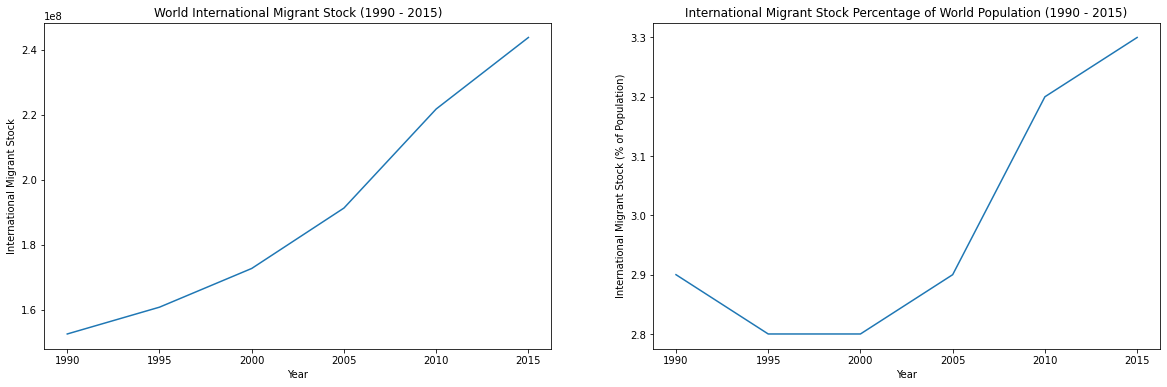

In [57]:
#visualization of world data
#Fig 1. International Migrant Stock vs Migrant stock % (World)
target_world = region_year.loc[(region_year['Destination'] == 'WORLD') & (region_year['Gender'] == 'Both')]
fig_dims = (20, 6)
fig, (ax1, ax2) = plt.subplots(figsize=fig_dims, nrows = 1, ncols = 2)
ax = sns.lineplot(data=target_world, x='Year', y='International Migrant Stock', ax=ax1)
ax1.set(title='World International Migrant Stock (1990 - 2015)')
ax = sns.lineplot(data=target_world, x='Year', y='International Migrant Stock as a Percentage of the Population', ax=ax2)
ax2.set(xlabel='Year', ylabel='International Migrant Stock (% of Population)', title='International Migrant Stock Percentage of World Population (1990 - 2015)')

In [33]:
#visualization of regions data
target_devy = region_year[region_year.Destination.isin(['Developedregions', 'Developingregions', 'Leastdevelopedcountries', 'Lessdevelopedregionsexcludingleastdevelopedcountries'])]
target_devy = target_devy.replace('Lessdevelopedregionsexcludingleastdevelopedcountries', 'Lessdevelopedregions')
target_devy.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Population (thousands),International Migrant Stock,Estimated refugee stock at mid-year,International Migrant Stock as a Percentage of the Population,Migrants as a percentage of the International migrant stock,Refugees as a percentage of the international migrant stock
1,Developedregions,(b),901,NaN,1990,Both,1144463,82378628,2014564.0,7.2,NaN,2.4
2,Developingregions,(c),902,NaN,1990,Both,4165205,70184584,16822007.0,1.7,NaN,24.0
3,Leastdevelopedcountries,(d),941,NaN,1990,Both,510058,11075966,5048391.0,2.2,NaN,45.6
4,Lessdevelopedregions,NaN,934,NaN,1990,Both,3655147,59105261,11773616.0,1.6,NaN,19.9
34,Developedregions,(b),901,NaN,1995,Both,1169761,92306854,3609670.0,7.9,NaN,3.9
35,Developingregions,(c),902,NaN,1995,Both,4565362,68494898,14244170.0,1.5,NaN,20.8
36,Leastdevelopedcountries,(d),941,NaN,1995,Both,585189,11711703,5160131.0,2.0,NaN,44.0
37,Lessdevelopedregions,NaN,934,NaN,1995,Both,3980173,56778501,9084039.0,1.4,NaN,16.0
67,Developedregions,(b),901,NaN,2000,Both,1188812,103375363,2997256.0,8.7,NaN,2.9
68,Developingregions,(c),902,NaN,2000,Both,4937810,69327946,12830547.0,1.4,NaN,18.5


Text(0.5, 0.98, 'Distribution of International Migrant Stock (Regions)')

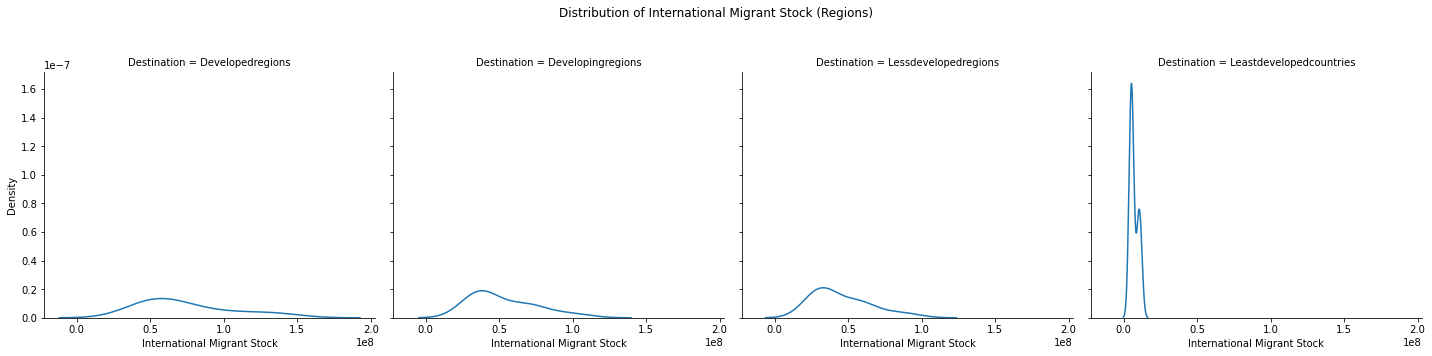

In [34]:
#Fig 2. FacetGrid of distribution of international migrant stock among destinations(regions)
g = sns.FacetGrid(target_devy, col='Destination', col_order=['Developedregions', 'Developingregions', 'Lessdevelopedregions', 'Leastdevelopedcountries'], height=5)
g = g.map_dataframe(sns.kdeplot, 'International Migrant Stock')
g.set_axis_labels('International Migrant Stock', 'Density')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of International Migrant Stock (Regions)')
#g.set_titles(col_template='{col_name}', row_template='{row_name}')
#g.add_legend()

Text(0.5, 0.98, 'Distribution of International Migrant Stock (% of Population) (Regions)')

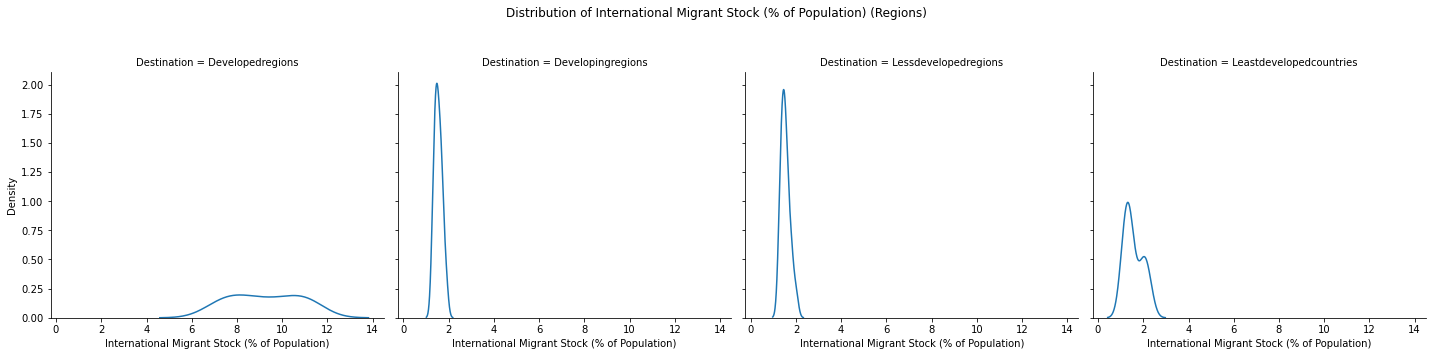

In [35]:
#Fig 3. FacetGrid of distribution of international migrant stock (% of population) among destinations (regions)
g = sns.FacetGrid(target_devy, col='Destination', col_order=['Developedregions', 'Developingregions', 'Lessdevelopedregions', 'Leastdevelopedcountries'], height=5)
g = g.map_dataframe(sns.kdeplot, 'International Migrant Stock as a Percentage of the Population')
g.set_axis_labels('International Migrant Stock (% of Population)', 'Density')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of International Migrant Stock (% of Population) (Regions)')
#g.set_titles(col_template='{col_name}', row_template='{row_name}')
#g.add_legend()

Text(0.5, 0.98, 'Distribution of Refugees (% of International Migrant Stock) (Regions)')

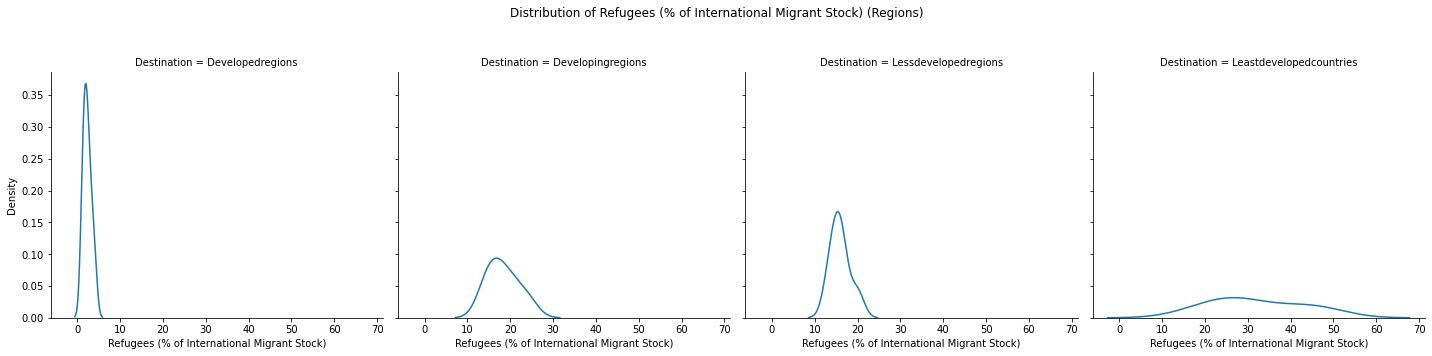

In [36]:
#Fig 4. FacetGrid of distribution of refugees (% of international migrant stock) among destinations (regions)
g = sns.FacetGrid(target_devy, col='Destination', col_order=['Developedregions', 'Developingregions', 'Lessdevelopedregions', 'Leastdevelopedcountries'], height=5)
g = g.map_dataframe(sns.kdeplot, 'Refugees as a percentage of the international migrant stock')
g.set_axis_labels('Refugees (% of International Migrant Stock)', 'Density')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Refugees (% of International Migrant Stock) (Regions)')
#g.set_titles(col_template='{col_name}', row_template='{row_name}')
#g.add_legend()

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'International Migrant Stock (% of Population)'),
 Text(0.5, 1.0, 'International Migrant Stock Percentage of Population by Regions (1990 - 2015)')]

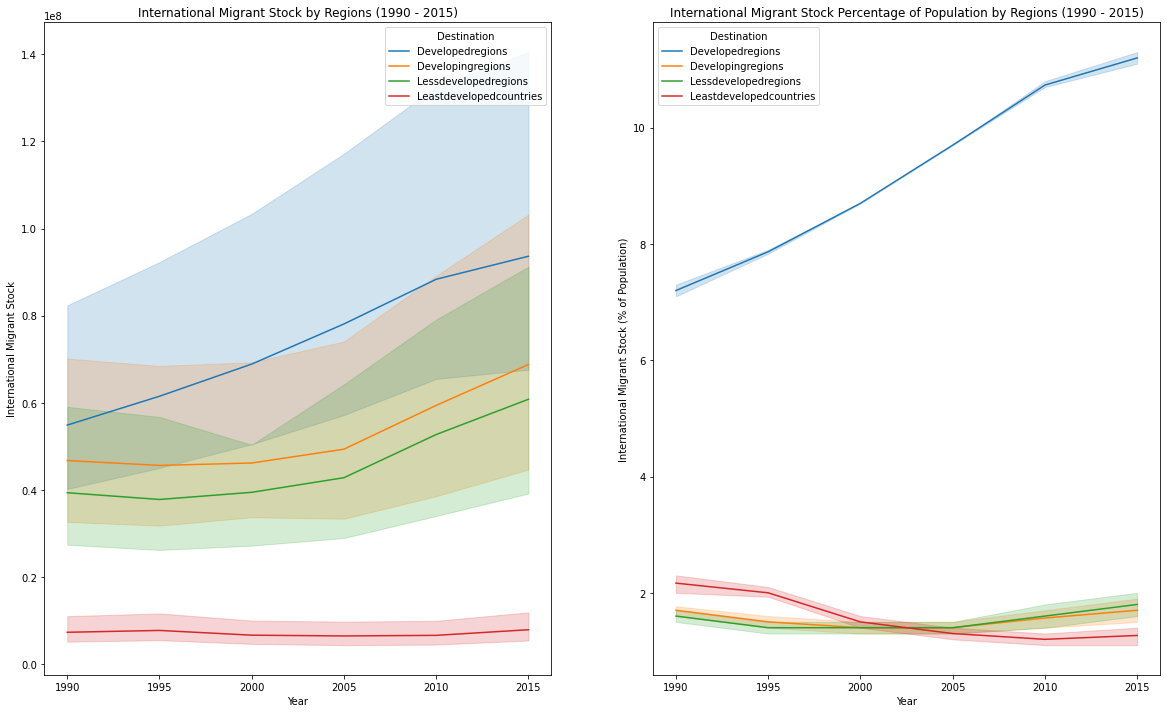

In [37]:
#Fig 5. Lineplot of international migrant stock vs international migrant stock as % of population (year)
fig_dims = (20, 12)
fig, (ax1, ax2) = plt.subplots(figsize=fig_dims, nrows = 1, ncols = 2)
sns.lineplot(data=target_devy, x='Year', y='International Migrant Stock', hue='Destination', hue_order=['Developedregions', 'Developingregions', 'Lessdevelopedregions', 'Leastdevelopedcountries'], ax=ax1)
ax1.set(title='International Migrant Stock by Regions (1990 - 2015)')
sns.lineplot(data=target_devy, x='Year', y='International Migrant Stock as a Percentage of the Population', hue='Destination', hue_order=['Developedregions', 'Developingregions', 'Lessdevelopedregions', 'Leastdevelopedcountries'], ax=ax2)
ax2.set(xlabel='Year', ylabel='International Migrant Stock (% of Population)', title='International Migrant Stock Percentage of Population by Regions (1990 - 2015)')

In [38]:
#visualization for major areas
#extracting df containing major areas
target_majorytmp = region_year.loc[(region_year['Country code'] == 935) | (region_year['Country code'] == 908) | (region_year['Country code'] == 903) | (region_year['Country code'] == 909) | (region_year['Country code'] == 904) | (region_year['Country code'] == 905)] 
target_japan = country_year.loc[(country_year['Country code'] == 392)]
target_majory = target_majorytmp.append(target_japan)
target_majory.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Population (thousands),International Migrant Stock,Estimated refugee stock at mid-year,International Migrant Stock as a Percentage of the Population,Migrants as a percentage of the International migrant stock,Refugees as a percentage of the international migrant stock
6,Africa,NaN,903,NaN,1990,Both,631614,15690623,5687352.0,2.5,NaN,36.2
12,Asia,NaN,935,NaN,1990,Both,3202475,48142261,9937007.0,1.5,NaN,20.6
18,Europe,NaN,908,NaN,1990,Both,721086,49219200,1321884.0,6.8,NaN,2.7
23,LatinAmericaandtheCaribbean,NaN,904,NaN,1990,Both,446889,7169728,1197198.0,1.6,NaN,16.7
27,NorthernAmerica,NaN,905,NaN,1990,Both,280633,27610542,583450.0,9.8,NaN,2.1
28,Oceania,NaN,909,NaN,1990,Both,26971,4730858,109680.0,17.5,NaN,2.3
39,Africa,NaN,903,NaN,1995,Both,720416,16352814,5949953.0,2.3,NaN,36.4
45,Asia,NaN,935,NaN,1995,Both,3474849,46548225,7937682.0,1.3,NaN,17.1
51,Europe,NaN,908,NaN,1995,Both,727778,52842663,2746090.0,7.3,NaN,5.2
56,LatinAmericaandtheCaribbean,NaN,904,NaN,1995,Both,487326,6694640,352256.0,1.4,NaN,5.3


Text(0.5, 0.98, 'Distribution of International Migrant Stock (Major Areas)')

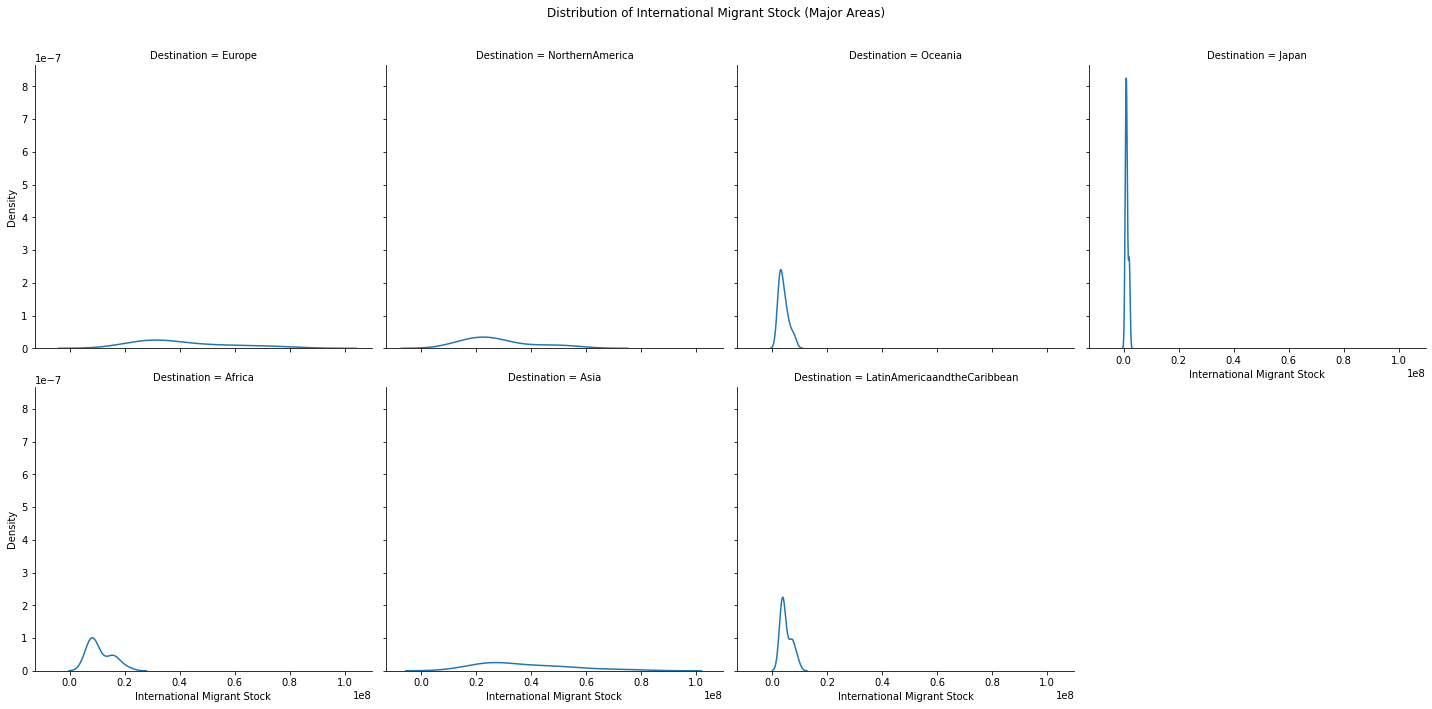

In [39]:
#Fig 6. FacetGrid of distribution of international migrant stock among destinations (major areas)
g = sns.FacetGrid(target_majory, col='Destination', col_wrap= 4, col_order=['Europe', 'NorthernAmerica', 'Oceania', 'Japan', 'Africa', 'Asia', 'LatinAmericaandtheCaribbean'], height=5)
g = g.map_dataframe(sns.kdeplot, 'International Migrant Stock')
g.set_axis_labels('International Migrant Stock', 'Density')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of International Migrant Stock (Major Areas)')
#g.set_titles(col_template='{col_name}', row_template='{row_name}')
#g.add_legend()

Text(0.5, 0.98, 'Distribution of International Migrant Stock (% of Population) (Major Areas)')

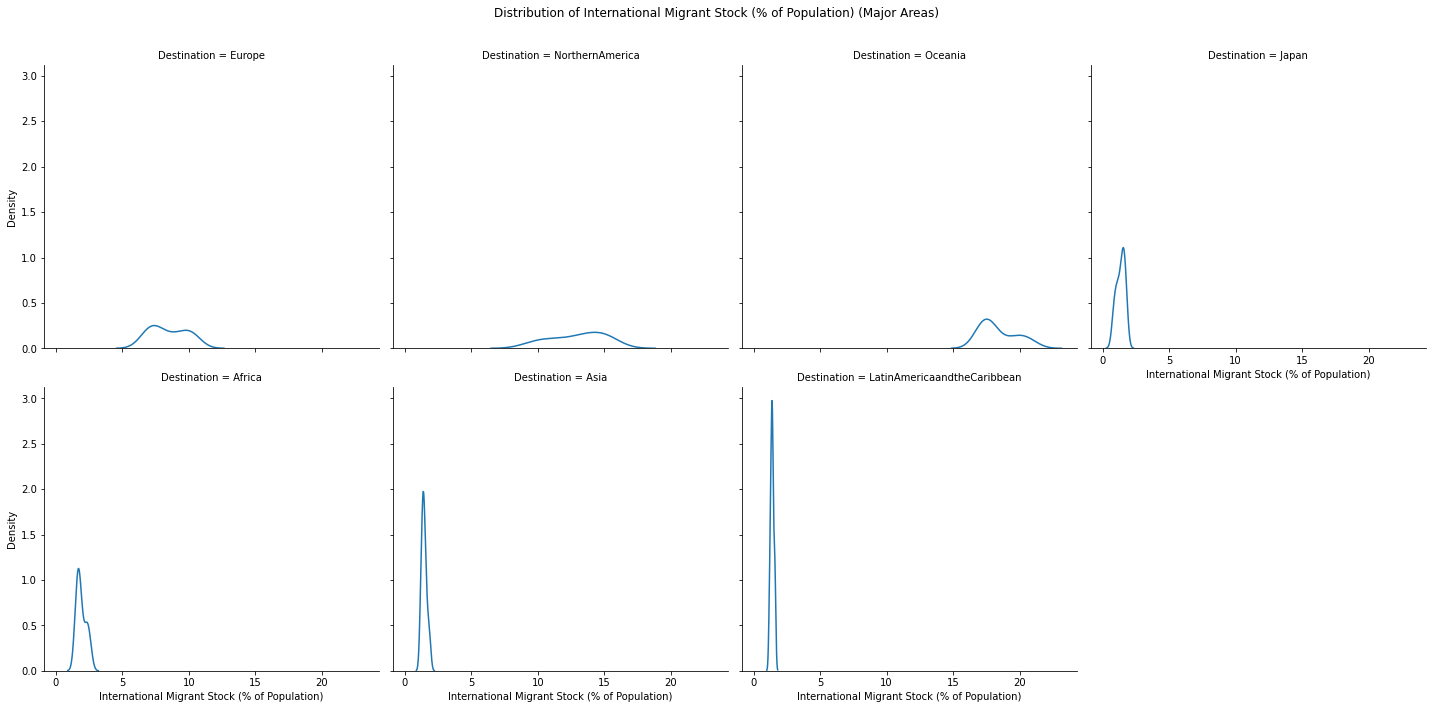

In [40]:
#Fig 7. FacetGrid of distribution of international migrant stock (% of population) among destinations (major areas)
g = sns.FacetGrid(target_majory, col='Destination', col_wrap= 4, col_order=['Europe', 'NorthernAmerica', 'Oceania', 'Japan', 'Africa', 'Asia', 'LatinAmericaandtheCaribbean'], height=5)
g = g.map_dataframe(sns.kdeplot, 'International Migrant Stock as a Percentage of the Population')
g.set_axis_labels('International Migrant Stock (% of Population)', 'Density')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of International Migrant Stock (% of Population) (Major Areas)')
#g.set_titles(col_template='{col_name}', row_template='{row_name}')
#g.add_legend()

Text(0.5, 0.98, 'Distribution of Refugees (% of International Migrant Stock) (Major Areas)')

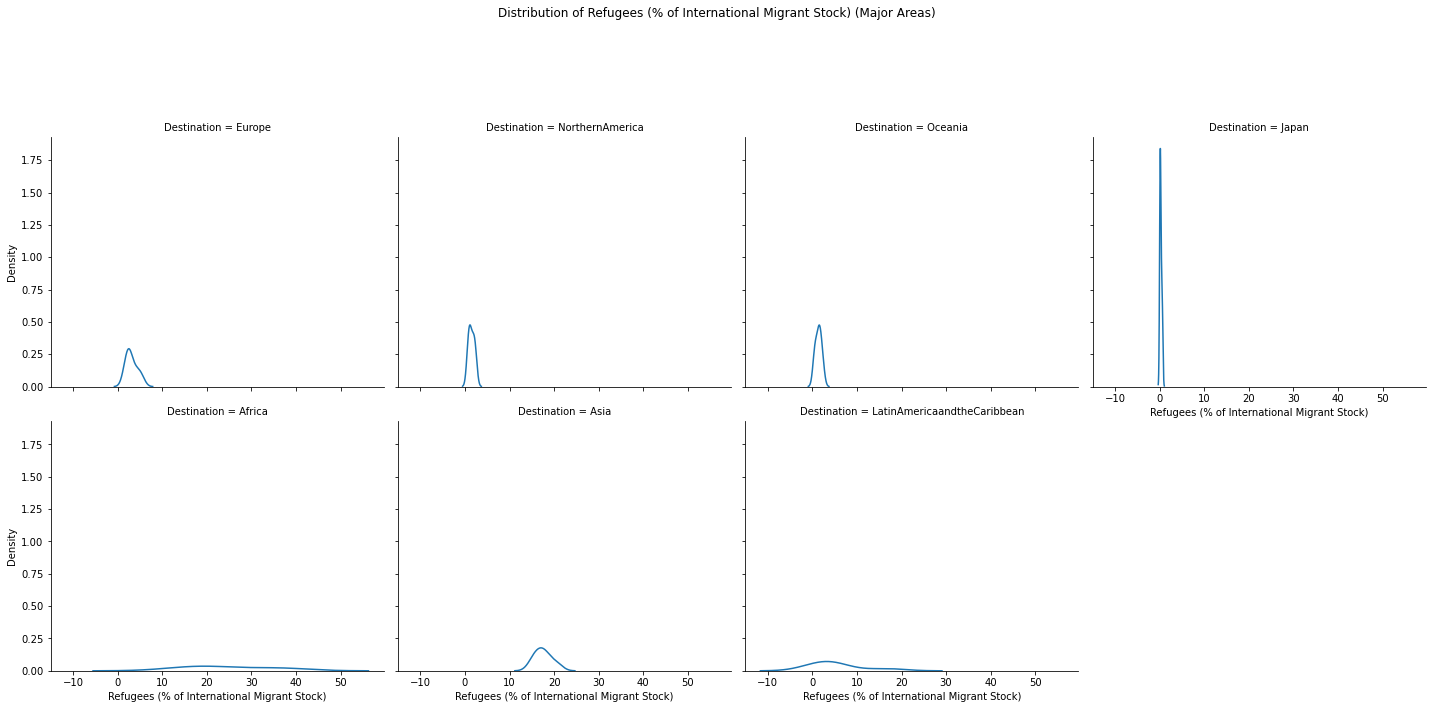

In [41]:
#Fig 8. FacetGrid of distribution of refugees (% of population) among destinations (major areas)
g = sns.FacetGrid(target_majory, col='Destination', col_wrap= 4, col_order=['Europe', 'NorthernAmerica', 'Oceania', 'Japan', 'Africa', 'Asia', 'LatinAmericaandtheCaribbean'], height=5)
g = g.map_dataframe(sns.kdeplot, 'Refugees as a percentage of the international migrant stock')
g.set_axis_labels('Refugees (% of International Migrant Stock)', 'Density')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Refugees (% of International Migrant Stock) (Major Areas)')
#g.set_titles(col_template='{col_name}', row_template='{row_name}')
#g.add_legend()

[Text(0.5, 1.0, 'International Migrant Stock by Major Areas (1990 - 2015)')]

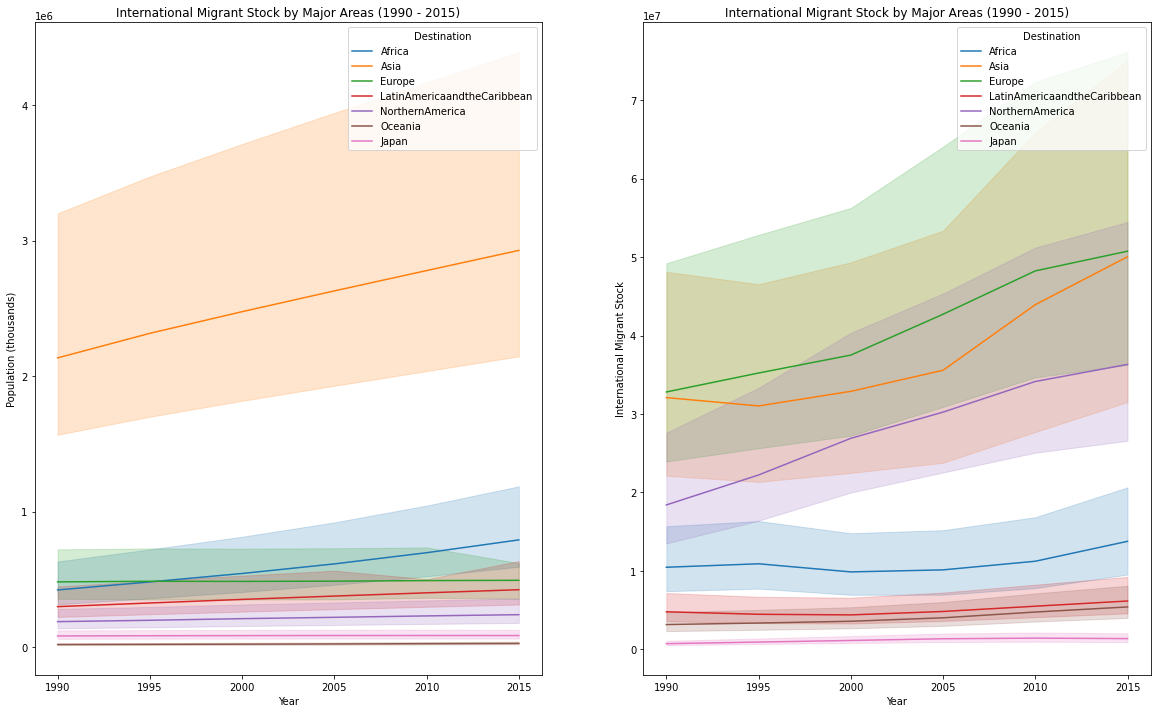

In [42]:
#Fig 9. Lineplot of population vs international migrant stock by destination (major areas)
fig_dims = (20, 12)
fig, (ax1, ax2) = plt.subplots(figsize=fig_dims, nrows = 1, ncols = 2)
sns.lineplot(data=target_majory, x='Year', y='Population (thousands)', hue='Destination', ax=ax1)
ax1.set(title='International Migrant Stock by Major Areas (1990 - 2015)')
sns.lineplot(data=target_majory, x='Year', y='International Migrant Stock', hue='Destination', ax=ax2)
ax2.set(title='International Migrant Stock by Major Areas (1990 - 2015)')

[Text(0, 0.5, 'International Migrant Stock (% of Population)'),
 Text(0.5, 1.0, 'International Migrant Stock (% of Population) by Major Areas (1990 - 2015)')]

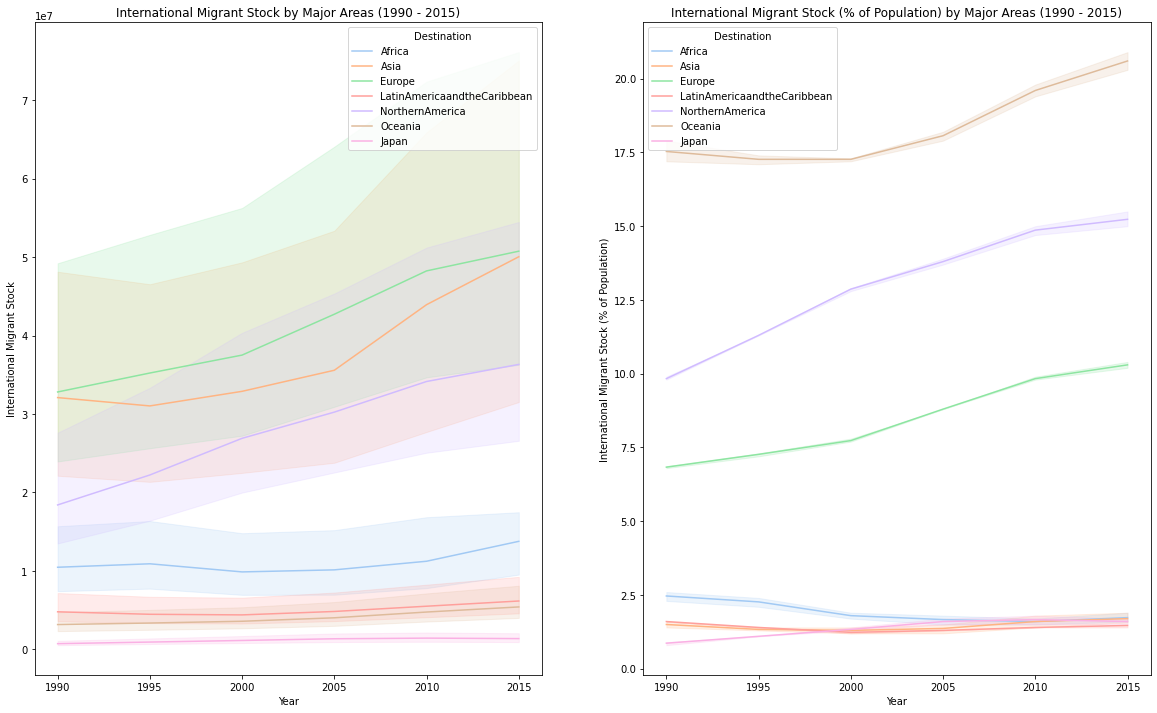

In [43]:
#Fig 10. Lineplot of international migrant stock vs international migrant stock (%) by destination (major areas)
fig_dims = (20, 12)
fig, (ax1, ax2) = plt.subplots(figsize=fig_dims, nrows = 1, ncols = 2)
sns.lineplot(data=target_majory, x='Year', y='International Migrant Stock', hue='Destination', palette = 'pastel', ax=ax1)
ax1.set(title='International Migrant Stock by Major Areas (1990 - 2015)')
sns.lineplot(data=target_majory, x='Year', y='International Migrant Stock as a Percentage of the Population', hue='Destination', palette = 'pastel', ax=ax2)
ax2.set(ylabel='International Migrant Stock (% of Population)', title='International Migrant Stock (% of Population) by Major Areas (1990 - 2015)')

In [44]:
#lineplot on female migrant (by regions)
target_majoryf = target_majory[(target_majory['Gender'] == 'Female')]
target_majoryf.head(10)

,Destination,Notes,Country code,Type of data,Year,Gender,Population (thousands),International Migrant Stock,Estimated refugee stock at mid-year,International Migrant Stock as a Percentage of the Population,Migrants as a percentage of the International migrant stock,Refugees as a percentage of the international migrant stock
402,Africa,NaN,903,NaN,1990,Female,316543,7411059,NaN,2.3,47.2,NaN
408,Asia,NaN,935,NaN,1990,Female,1567740,22130386,NaN,1.4,46.0,NaN
414,Europe,NaN,908,NaN,1990,Female,373730,25272527,NaN,6.8,51.3,NaN
419,LatinAmericaandtheCaribbean,NaN,904,NaN,1990,Female,224899,3572691,NaN,1.6,49.8,NaN
423,NorthernAmerica,NaN,905,NaN,1990,Female,142875,14113223,NaN,9.9,51.1,NaN
424,Oceania,NaN,909,NaN,1990,Female,13457,2315816,NaN,17.2,49.0,NaN
435,Africa,NaN,903,NaN,1995,Female,361008,7735883,NaN,2.1,47.3,NaN
441,Asia,NaN,935,NaN,1995,Female,1700275,21350703,NaN,1.3,45.9,NaN
447,Europe,NaN,908,NaN,1995,Female,376878,27206857,NaN,7.2,51.5,NaN
452,LatinAmericaandtheCaribbean,NaN,904,NaN,1995,Female,245635,3344871,NaN,1.4,50.0,NaN


[Text(0, 0.5, 'Female Migrants (% of International Migrant Stock)'),
 Text(0.5, 1.0, 'Female Migrant Stock (% of Population) by Major Areas (1990 - 2015)')]

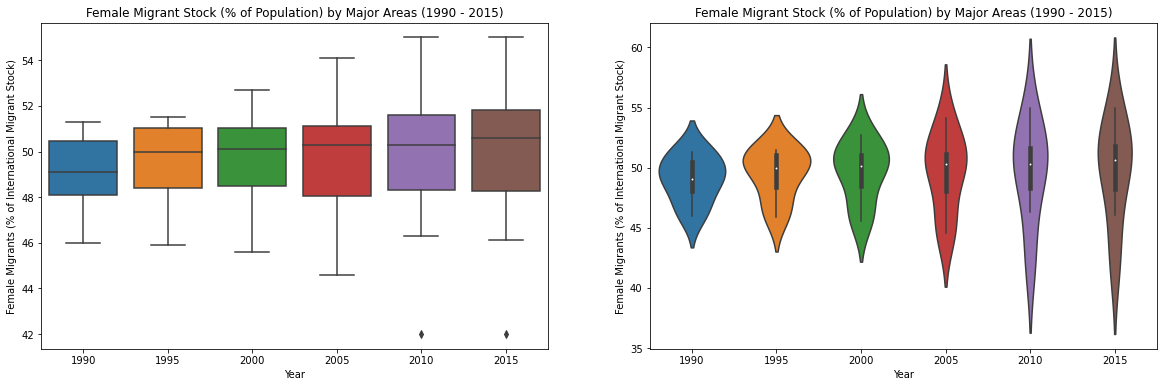

In [45]:
#Fig 11. Boxplot and violinplot of Female Migrant Stock (% of Population) by Major Areas (1990 - 2015)
fig_dims = (20, 6)
fig, (ax1, ax2) = plt.subplots(figsize=fig_dims, nrows = 1, ncols = 2)
sns.boxplot(x='Year', y='Migrants as a percentage of the International migrant stock', data=target_majoryf, ax=ax1)
ax1.set(ylabel='Female Migrants (% of International Migrant Stock)', title='Female Migrant Stock (% of Population) by Major Areas (1990 - 2015)')
sns.violinplot(x='Year', y='Migrants as a percentage of the International migrant stock', data=target_majoryf, ax=ax2)
ax2.set(ylabel='Female Migrants (% of International Migrant Stock)', title='Female Migrant Stock (% of Population) by Major Areas (1990 - 2015)')

[Text(0, 0.5, 'Female Migrants (% of International Migrant Stock)'),
 Text(0.5, 1.0, 'Female Migrant Stock (% of Population) by Major Areas (1990 - 2015)')]

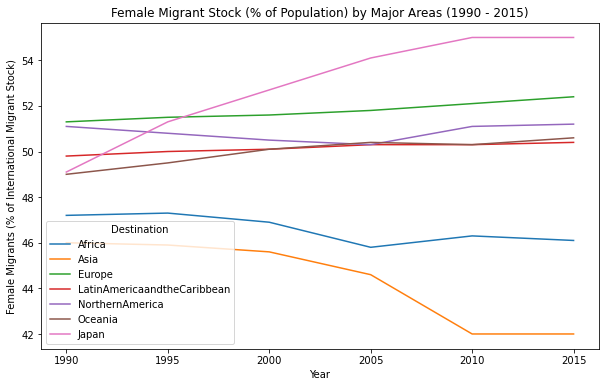

In [46]:
#Fig 12. Lineplot Female Migrant Stock (% of Population) by Major Areas (1990 - 2015)
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=target_majoryf, x='Year', y='Migrants as a percentage of the International migrant stock', hue='Destination')
ax.set(ylabel='Female Migrants (% of International Migrant Stock)', title='Female Migrant Stock (% of Population) by Major Areas (1990 - 2015)')

In [47]:
#visualization of top migrant destinations
df_tmp = country_year[(country_year['Gender']=='Both')]
df_tmp = df_tmp.nlargest(60, 'International Migrant Stock')
target_top = df_tmp.replace('UnitedStatesofAmerica', 'USA').replace('UnitedKingdomofGreatBritainandNorthernIreland', 'UK').replace('RussianFederation', 'Russia').replace('UnitedArabEmirates', 'United Arab')
target_top.head(20)

,Destination,Notes,Country code,Type of data,Year,Gender,Population (thousands),International Migrant Stock,Estimated refugee stock at mid-year,International Migrant Stock as a Percentage of the Population,Migrants as a percentage of the International migrant stock,Refugees as a percentage of the international migrant stock
1368,USA,NaN,840,B,2015,Both,321774,46627102,263662.0,14.5,NaN,0.6
1136,USA,NaN,840,B,2010,Both,309876,44183643,264574.0,14.3,NaN,0.6
904,USA,NaN,840,B,2005,Both,296140,39258293,379340.0,13.3,NaN,1.0
672,USA,NaN,840,B,2000,Both,282896,34814053,508222.0,12.3,NaN,1.5
440,USA,NaN,840,B,1995,Both,266276,28451053,623294.0,10.7,NaN,2.2
208,USA,NaN,840,B,1990,Both,252848,23251026,438193.0,9.2,NaN,1.9
1310,Germany,NaN,276,B,2015,Both,80689,12005690,216973.0,14.9,NaN,1.8
347,Russia,NaN,643,B,1995,Both,148293,11928927,0.0,8.0,NaN,0.0
579,Russia,NaN,643,B,2000,Both,146401,11900297,26265.0,8.1,NaN,0.2
811,Russia,NaN,643,B,2005,Both,143623,11667588,1523.0,8.1,NaN,0.0


[Text(0.5, 1.0, 'International Migrant Stock by Top Destinations (1990 - 2015)')]

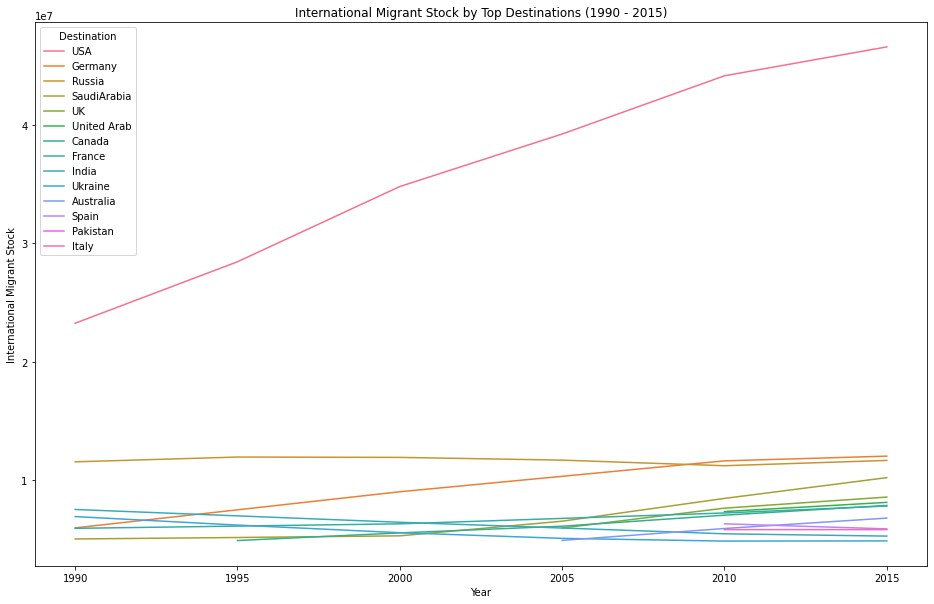

In [48]:
# Fig 13. International Migrant Stock by Top Destinations (1990 - 2015)
fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.lineplot(data=target_top, x='Year', y='International Migrant Stock', hue='Destination', legend='full')
ax.set(title='International Migrant Stock by Top Destinations (1990 - 2015)')

[Text(0.5, 1.0, 'Distribution of International Migrant Stock by Top Destinations (1990 - 2015)')]

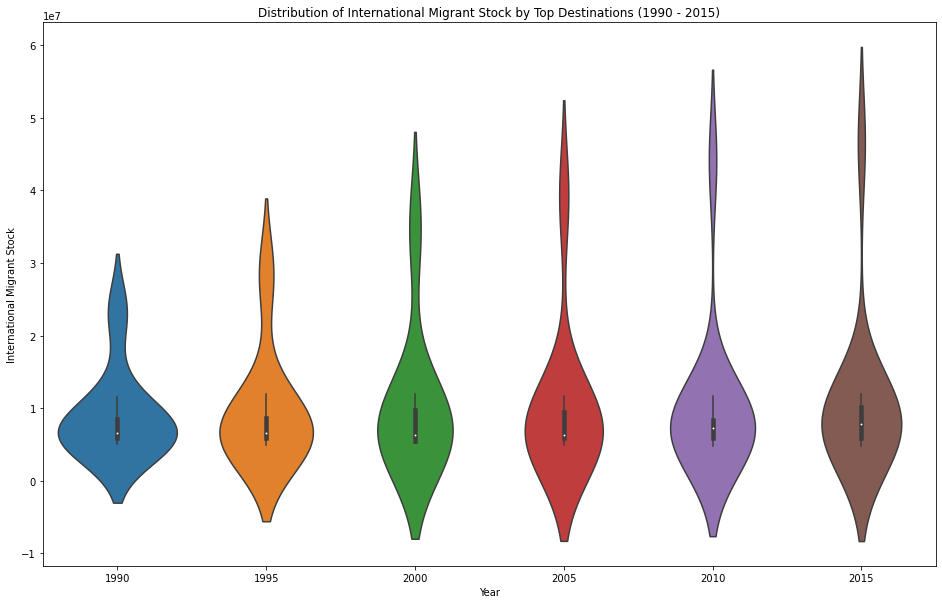

In [49]:
#Fig 14. Violinplot of Distribution of International Migrant Stock by Top Destinations (1990 - 2015)
fig_dims = (16, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.violinplot(x='Year', y='International Migrant Stock', data=target_top)
ax.set(title='Distribution of International Migrant Stock by Top Destinations (1990 - 2015)')

Text(0.5, 0.98, 'Population vs International Migration Stock vs % of Population by Top Destinations')

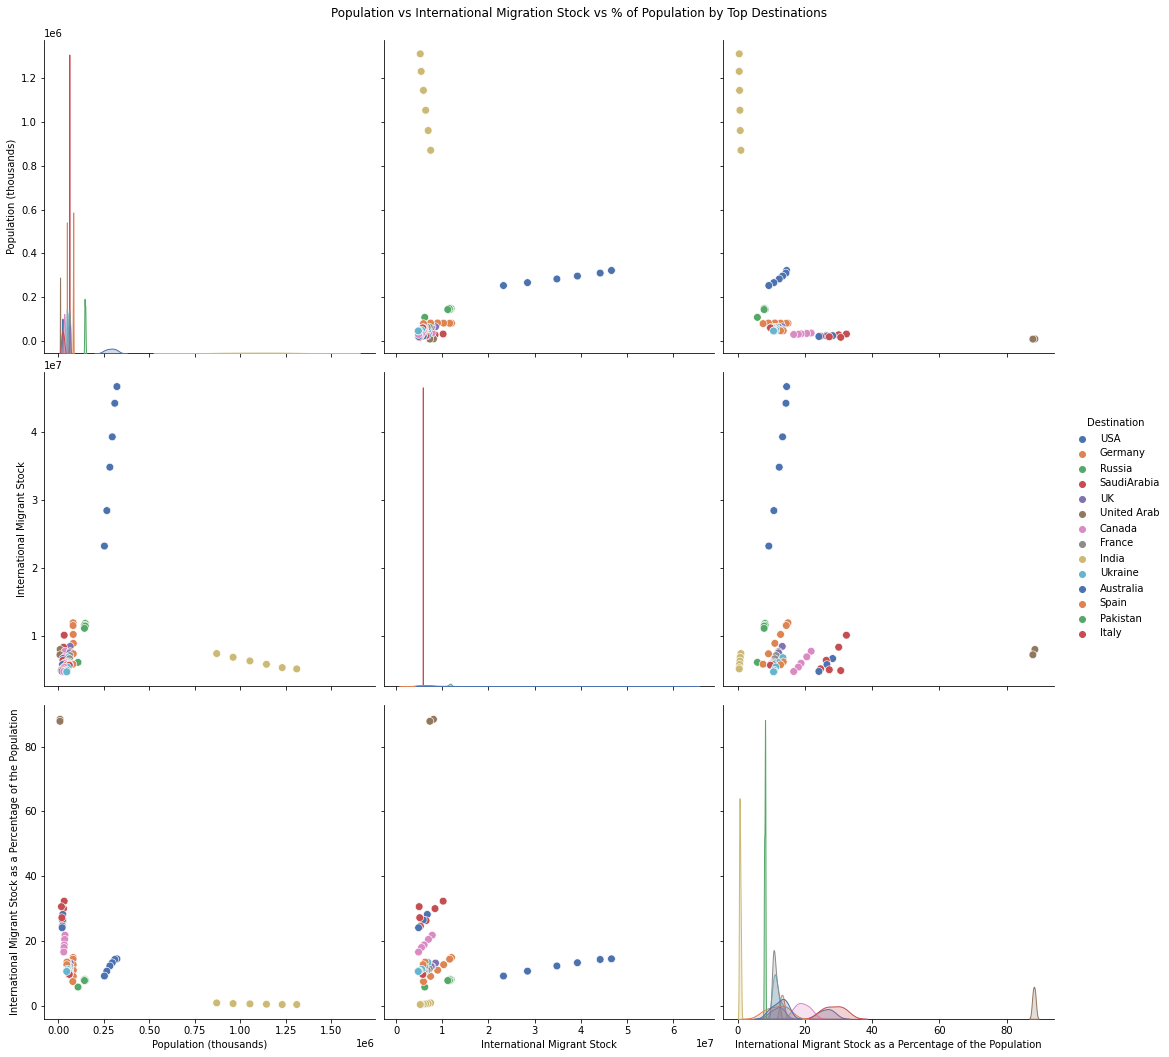

In [50]:
#Fig 15. Pairplot Population vs International Migration Stock vs % of Population by Top Destinations
g = sns.pairplot(target_top, vars=['Population (thousands)', 'International Migrant Stock',
       'International Migrant Stock as a Percentage of the Population'], hue='Destination', palette='deep', plot_kws={'s': 60}, height=5)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Population vs International Migration Stock vs % of Population by Top Destinations')